In [2]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data') # pandas에 read_csv를 호출하여 해당 주소에 있는 데이터를 가져옴
print(wine.info(), wine.head()) # 데이터를 확인하기 위해 info()함수를 사용

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB
None    alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0


In [3]:
data = wine[['alcohol', 'sugar', 'pH']]
target = wine['class']

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2) # train과 test 데이터를 8 : 2의 비율로 나눈다.

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion = 'entropy', 
                            n_estimators = 100, 
                            max_depth = 4, 
                            random_state = 123456) #  n_estimators의 default 값은 100

rf.fit(train_input, train_target)
print('학습데이터 성능 :',rf.score(train_input, train_target))
print('테스트데이터 성능 :',rf.score(test_input, test_target))

학습데이터 성능 : 0.8520300173176832
테스트데이터 성능 : 0.8315384615384616


In [6]:
rf.estimators_[0] # 첫번째 Decision Tree의 정보

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='auto',
                       random_state=545331265)

In [7]:
print('Estimators의 개수는', len(rf.estimators_))

Estimators의 개수는 100


In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

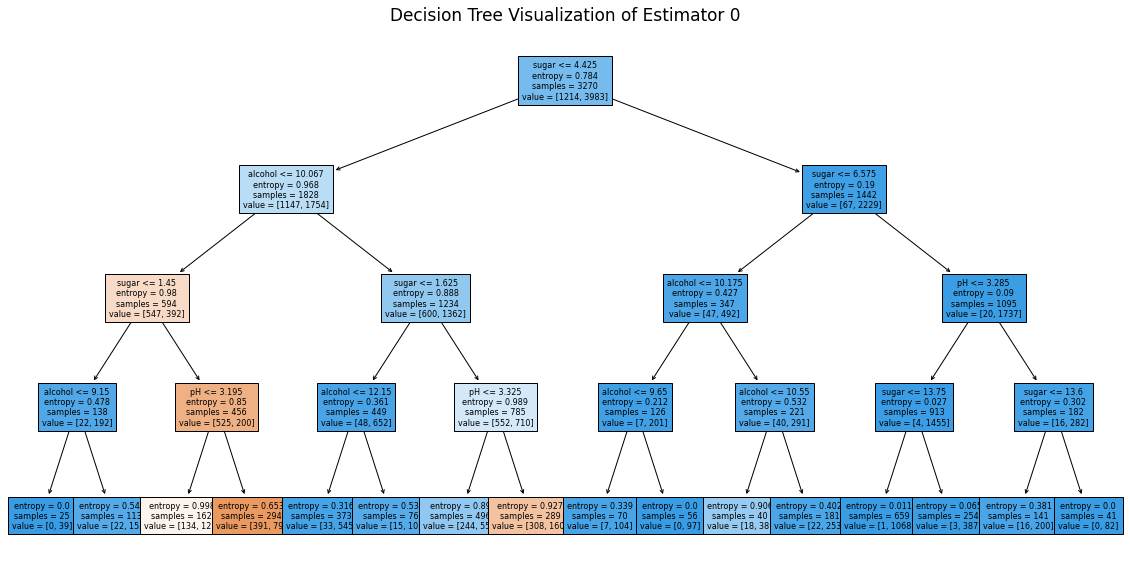

In [9]:
f, ax = plt.subplots(figsize = (20,10))
plot_tree(rf.estimators_[0], 
          feature_names = ['alcohol', 'sugar', 'pH'], 
          filled = True, 
          fontsize = 8)
plt.title('Decision Tree Visualization of Estimator 0', fontsize = 17)
plt.show()

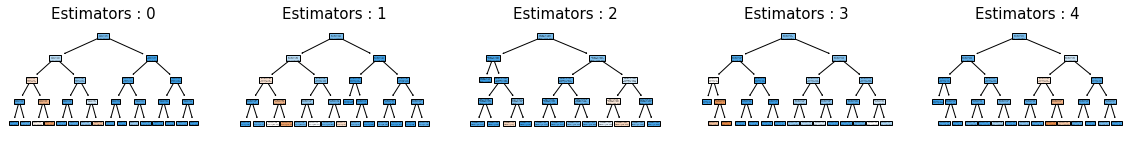

In [10]:
f, ax = plt.subplots(1,5, figsize = (20, 2))

for i in range(5):
  plot_tree(rf.estimators_[i],
            feature_names = ['alcohol', 'sugar', 'pH'],
            filled = True,
            ax = ax[i])
  ax[i].set_title('Estimators : '+str(i), fontsize = 15)

좋은 성능을 얻기 위해 다수의 학습 알고리즘을 사용하는 것을 앙상블(emsemble) 학습법일고 부른다. 각 나무들을 어떻게 생성하는지 알아야하며 배깅(Bagging)이라는 프로세스를 통해 나무를 만든다.

1000개의 행을 가지고 있는 데이터셋에서 임의의 100개의 행을 선택해서 의사결정 트리를 만드는 것이 배깅이다. 중복을 허용하며 학습 데이터의 일부를 기반으로 생성되었다.
100개를 임의로 뽑아 첫 번째 트리를 만들고 다시 도로 집어넣는다.

***begging Feature***

트리를 만들 때 만들 때 사용될 속성(Feaature)들을 제한함으로써 각 나무들에 다양성을 준다. 각 분할에서 전체 속성들중일부만 고려하여 트리를 작성하도록 하는 전략이다.

전체 속성의 제곱근만큼 선택하는 것이 가장 좋다.

In [11]:
print(rf.feature_importances_)

[0.11910029 0.62470156 0.25619815]


n_estimatos 개수만큼 트리를 뽑아내게 된다.

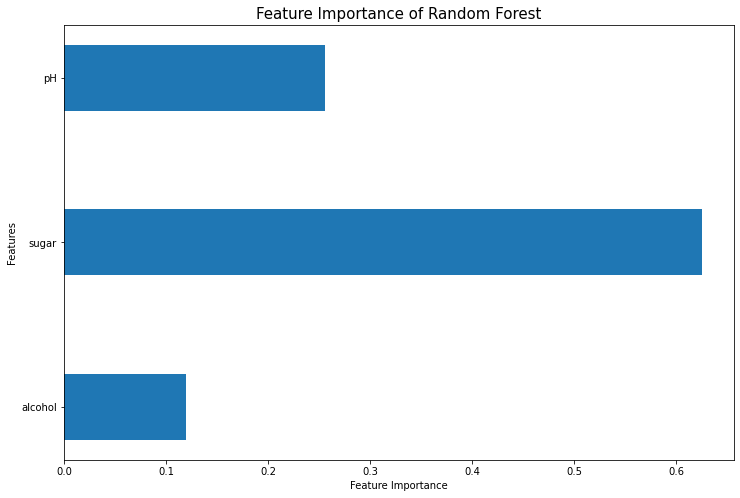

In [12]:
f, ax = plt.subplots(figsize = (12, 8))

plt.barh(['alcohol', 'sugar', 'pH'], rf.feature_importances_, height = 0.4)
plt.title('Feature Importance of Random Forest', fontsize = 15)
plt.xlabel('Feature Importance')
plt.ylabel('Features')

plt.show()

연속형이거나 범주의 개수가 많은 high-cardinality 변수일수록 mean decrease in impurity 기반의 feature importance가 과대평가된다.
따라서 반드시 **무조건적으로** 신뢰를 할 수 없다.
특히 모델이 과적합되어 지나치게 많은 분기가 이루어질 경우 이러한 현상이 더욱 심해진다. 따라서 제대로된 feature importance를 얻기 위해서는 모델을 과적합시키지 않는 것이 중요하다.

### 유방암 랜덤 포레스트

In [13]:
from sklearn.datasets import load_breast_cancer # 위스콘신 유방암 데이터

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target # 우리가 맞춰야할 변수이다.

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [14]:
y = df['target']
del df['target'] # 열 삭제처리

train_x, test_x, train_y, test_y = train_test_split(df, y, test_size = 0.3, shuffle = True) 

In [59]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(train_x, train_y)
prediction = rfc.predict(test_x)
prediction2 = rfc.predict(train_x)

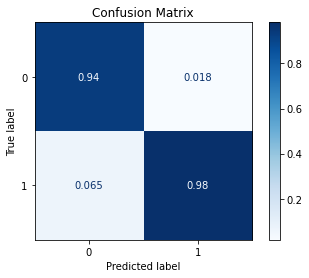

In [60]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

cf = confusion_matrix(prediction, test_y)
plot = plot_confusion_matrix(rfc,
                            test_x, test_y,
                            cmap =  'Blues',
                            normalize = 'pred')

plot.ax_.set_title('Confusion Matrix')
plt.show()

In [61]:
from sklearn import metrics

In [62]:
print('train set accuracy : ', metrics.accuracy_score(train_y, prediction2))
print('test set accuracy : ', metrics.accuracy_score(test_y, prediction))


train set accuracy :  1.0
test set accuracy :  0.9649122807017544


과적합 없이 모델을 돌린 경우 train accurancy는 1.0이고 test는 0.98정도가 나왔다..


In [63]:
print(rfc.feature_importances_)

[0.06106456 0.01913708 0.07717667 0.04080146 0.00463887 0.01088831
 0.04268342 0.08888872 0.00355636 0.00602619 0.02535759 0.00305661
 0.00504109 0.02526968 0.00634539 0.00389003 0.0063098  0.00371952
 0.00455214 0.00486711 0.07650221 0.02291147 0.12317485 0.12338151
 0.01287101 0.01422181 0.03889984 0.12555523 0.00966591 0.00954554]


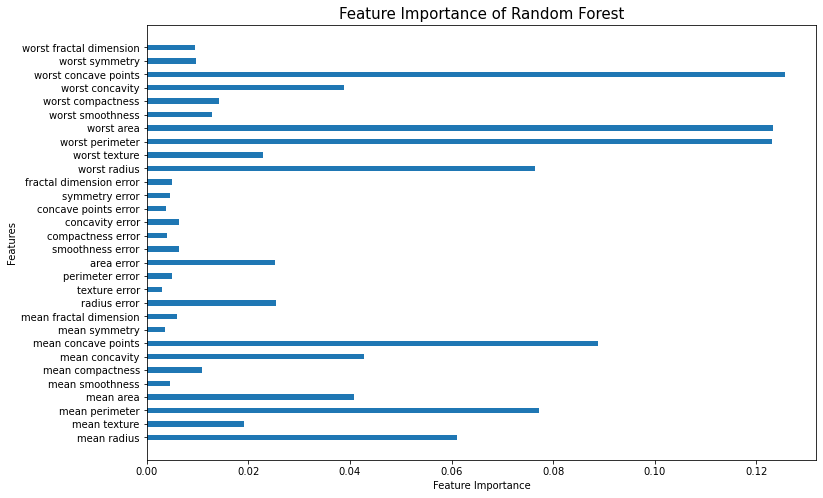

In [64]:
f, ax = plt.subplots(figsize = (12, 8))

plt.barh(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
      'mean smoothness', 'mean compactness', 'mean concavity',
      'mean concave points', 'mean symmetry', 'mean fractal dimension',
      'radius error', 'texture error', 'perimeter error', 'area error',
      'smoothness error', 'compactness error', 'concavity error',
      'concave points error', 'symmetry error',
      'fractal dimension error', 'worst radius', 'worst texture',
      'worst perimeter', 'worst area', 'worst smoothness',
      'worst compactness', 'worst concavity', 'worst concave points',
      'worst symmetry', 'worst fractal dimension'], rfc.feature_importances_, height = 0.4)
plt.title('Feature Importance of Random Forest', fontsize = 15)
plt.xlabel('Feature Importance')
plt.ylabel('Features')

plt.show()

worst concave points가 가장 important한 요소임을 알 수 있다. 세포에 음푹 패인 곳 악성 종양 그런 느낌인 것 같다.

연속형 변수일수록, cardinality가 클수록 노드 중요도가 매우 커진다는 것을 주시하고 불순도 기반 변수 중요도는 모델을 과적합 시키지 않는 선에서는 좋은 참고 자료가 될 것이다.

parameter 하나하나에 따라 변수 중요도가 차이가 나면 **신뢰할만 하지 못한거 아닌가?** 라는 의문을 가질 수 있지만 항상 상위권을 유지하는 변수들은 어느정도 변수 중요도가 높은 변수라고 볼 수 있다.

테스트 세트가 학습 세트보다 score 점수가 높다면 ***과소적합***이 발생하였다고 하며 모델이 너무 단순하여 훈련세트가 제대로 훈련되지 않은 경우라고 한다.

In [50]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=300, random_state=0, max_depth=10)

rfc.fit(train_x, train_y)
prediction = rfc.predict(test_x)
prediction2 = rfc.predict(train_x)

In [51]:
print('train set accuracy : ', metrics.accuracy_score(train_y, prediction2))
print('test set accuracy : ', metrics.accuracy_score(test_y, prediction))

train set accuracy :  1.0
test set accuracy :  0.9766081871345029


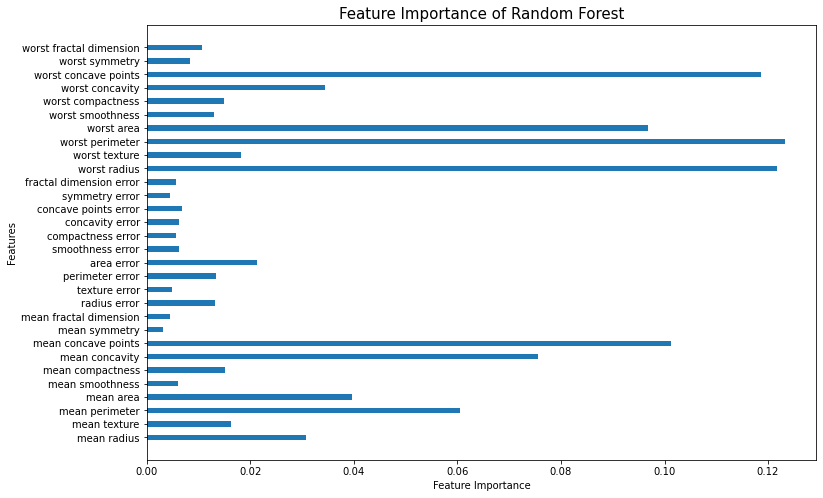

In [52]:
f, ax = plt.subplots(figsize = (12, 8))

plt.barh(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
      'mean smoothness', 'mean compactness', 'mean concavity',
      'mean concave points', 'mean symmetry', 'mean fractal dimension',
      'radius error', 'texture error', 'perimeter error', 'area error',
      'smoothness error', 'compactness error', 'concavity error',
      'concave points error', 'symmetry error',
      'fractal dimension error', 'worst radius', 'worst texture',
      'worst perimeter', 'worst area', 'worst smoothness',
      'worst compactness', 'worst concavity', 'worst concave points',
      'worst symmetry', 'worst fractal dimension'], rfc.feature_importances_, height = 0.4)
plt.title('Feature Importance of Random Forest', fontsize = 15)
plt.xlabel('Feature Importance')
plt.ylabel('Features')

plt.show()

위 같은 경우는 n_estimators를 30 random_state를 0, max_depth를 10으로 설정했을 때 위의 feature importance와 비교한 결과다.
생성할 트리개수, 트리의 최대 깊이만 다르게 해줘도 다른 결고가 값이 나온다는 것을 알 수 있다. 하지만 이렇게 해주면 worst concavity points는 여전히 높은 중요도를 띄고 있다. worst area, worst parimeter도 마찬가지로 이전과 important feature이라는 것임을 알 수 있다.

In [88]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier( max_depth=7)

rfc.fit(train_x, train_y)
prediction = rfc.predict(test_x)
prediction2 = rfc.predict(train_x)

In [89]:
print('train set accuracy : ', metrics.accuracy_score(train_y, prediction2))
print('test set accuracy : ', metrics.accuracy_score(test_y, prediction))

train set accuracy :  0.9974874371859297
test set accuracy :  0.9766081871345029


In [83]:
0.9766081871345029 - 0.9707602339181286

0.005847953216374324

max_depth를 7로 설정했을 때 오버피팅을 막아 훈련 세트 정확도는 아까보다 떨어졌지만 테스트 세트 정확도가 더 높아졌다. 

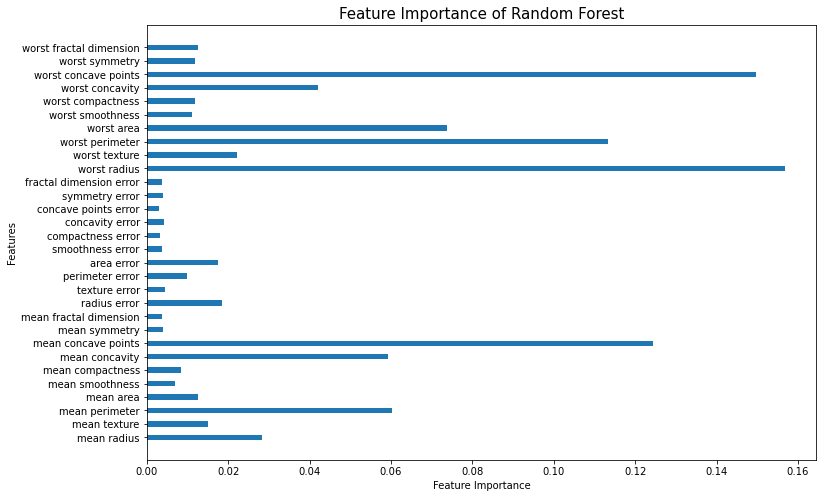

In [90]:
f, ax = plt.subplots(figsize = (12, 8))

plt.barh(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
      'mean smoothness', 'mean compactness', 'mean concavity',
      'mean concave points', 'mean symmetry', 'mean fractal dimension',
      'radius error', 'texture error', 'perimeter error', 'area error',
      'smoothness error', 'compactness error', 'concavity error',
      'concave points error', 'symmetry error',
      'fractal dimension error', 'worst radius', 'worst texture',
      'worst perimeter', 'worst area', 'worst smoothness',
      'worst compactness', 'worst concavity', 'worst concave points',
      'worst symmetry', 'worst fractal dimension'], rfc.feature_importances_, height = 0.4)
plt.title('Feature Importance of Random Forest', fontsize = 15)
plt.xlabel('Feature Importance')
plt.ylabel('Features')

plt.show()

이 또한 역시 worst concave points, worst radius가 눈에 띄는데 위의 모든 결과를 봤을 때 처음에는 worst concave points가 가장 중요한 feature일 줄 알았지만 worst radius의 증감폭이 좁고 항상 높은 수치를 차지하는 것을 보아 더 중요한 요소임을 할 수 있다. 하지만 여러 중요한 요소를 같이 보는 것이 중요하며 한 가지만으로는 0.20 이내의 관계성을 보이므로 단독으로 사용하는것은 지양해야 할 것 같다.